# **PFE: solution of differential equations PDEs**

### **PART 1 : solving partial differential equations using deep learning 'Neural networks' with SciANN library**

#### **The third type of equations is heat equation**

   * **Importing libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import graphviz
import sciann as sn

---------------------- SCIANN 0.6.5.1 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://www.sciencedirect.com/science/article/pii/S0045782520307374", 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 

 Need support or would like to contribute, please join sciann`s slack group: 
 +  "https://join.slack.com/t/sciann/shared_invite/zt-ne1f5jlx-k_dY8RGo3ZreDXwz0f~CeA" 
 
TensorFlow Version: 2.5.3 
Python Version: 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)] 



In [2]:
x = sn.Variable('x', dtype='float64')
t = sn.Variable('t', dtype='float64')

T = sn.Functional('T', [x, t], 8*[20], 'tanh')

In [3]:
T_t = sn.diff(T, t)
T_xx = sn.diff(T, x, order=2)

alpha = sn.Parameter(np.random.rand(), inputs=[x, t], name='alpha')


In [4]:
L = T_t - (alpha * T_xx)

In [5]:
np.random.seed(0)
A = np.random.rand()
B = np.random.rand()
C = np.random.rand()
C3 = A*sn.exp((T**2) * t + T*x) + B
C4 = A * sn.exp(-(T**2) * t) * sn.cos(T*x + B) + C
C5 = A * sn.exp(-T*x) * sn.cos((T*x) - (2* T**2 * t) + B) + C 

In [30]:
model = sn.SciModel([x, t], [L, C3, C4, C5], loss_func= 'mse', optimizer='adam', plot_to_file='HE-Model.png')
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x (InputLayer)                  [(None, 1)]          0                                            
__________________________________________________________________________________________________
t (InputLayer)                  [(None, 1)]          0                                            
__________________________________________________________________________________________________
concat (Concatenate)            (None, 2)            0           x[0][0]                          
                                                                 t[0][0]                          
__________________________________________________________________________________________________
D20b (Dense)                    (None, 20)           60          concat[0][0]               

In [7]:
# train the network
x_train, t_train = np.meshgrid(
    np.linspace(0, 10, 100), 
    np.linspace(0, 10, 100)
)
print(x_train.shape)
print(t_train.shape)

(100, 100)
(100, 100)


In [8]:
training_history = model.train([x_train, t_train], 4*['zeros'], epochs= 100, learning_rate=0.001, verbose=0)


Total samples: 10000 
Batch size: 64 
Total batches: 157 


Epoch 00082: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00100: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.


In [9]:
print(f"alpha : {alpha.value}")

alpha : [0.33761762]


Text(0, 0.5, 'loss')

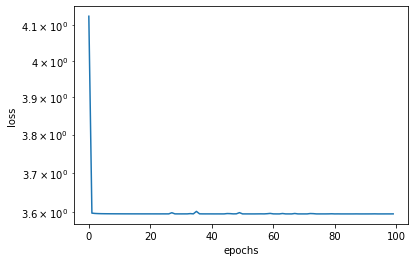

In [10]:
plt.semilogy(training_history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

In [20]:
T_train_eval = T.eval(model, [x_train, t_train])
T_train_eval

array([[ 0.12382208,  0.1458718 ,  0.16163178, ...,  0.02246314,
         0.02226601,  0.02207385],
       [ 0.10451515,  0.12788705,  0.14579336, ...,  0.02238656,
         0.02218862,  0.02199572],
       [ 0.08632957,  0.10998076,  0.12899524, ...,  0.02230168,
         0.02210396,  0.02191129],
       ...,
       [-0.00086467,  0.0015468 ,  0.00396726, ...,  0.01923   ,
         0.01907315,  0.0189113 ],
       [-0.00085871,  0.00153001,  0.0039299 , ...,  0.01924859,
         0.01909979,  0.01894551],
       [-0.00085244,  0.00151395,  0.00389377, ...,  0.01926009,
         0.01911999,  0.01897411]])

In [21]:
x_test, t_test = np.meshgrid(
    np.linspace(0, 10, 50), 
    np.linspace(0, 10, 50)
)
print(x_test.shape)
print(t_test.shape)

(50, 50)
(50, 50)


In [22]:
T_test_eval = T.eval(model, [x_test, t_test])
T_test_eval

array([[ 0.12382208,  0.16189333,  0.17773603, ...,  0.02288151,
         0.02246721,  0.02207385],
       [ 0.08598029,  0.12899853,  0.15380953, ...,  0.02271979,
         0.02230403,  0.02190957],
       [ 0.05672499,  0.09867328,  0.12705062, ...,  0.02255302,
         0.02214082,  0.02174976],
       ...,
       [-0.00087574,  0.00409742,  0.00882476, ...,  0.01951031,
         0.01917808,  0.01883005],
       [-0.00086479,  0.00401704,  0.00865478, ...,  0.01953457,
         0.0192327 ,  0.01891055],
       [-0.00085244,  0.00394195,  0.00849496, ...,  0.01953004,
         0.01926289,  0.01897411]])

C:\Users\YOUSSE~1\AppData\Local\Temp/ipykernel_1472/1976347678.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_test, t_test, T_test_eval, cmap='seismic')


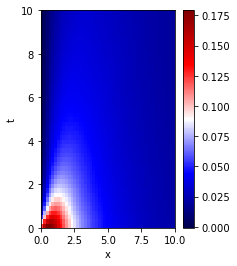

In [24]:
fig = plt.figure(figsize=(3, 4))
plt.pcolor(x_test, t_test, T_test_eval, cmap='seismic')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()

In [29]:
T_pred = model.predict([x_test, t_test], batch_size=None, verbose=0, steps=None)
np.array(T_pred).shape

(4, 50, 50)